# Compare Machine Learning Algorithms
* It is important to compare the performance of multiple different machine learning algorithms consistently.
* The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data.

## six different classification algorithms are compared on a single dataset : 
* Logistic Regression
* Linear Discriminant Analysis
* k-Nearest Neighbors
* Classification and Regression Trees
* Naive Bayes
* Support Vector Machines

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.773428 (0.053375)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.683493 (0.071411)
NB: 0.755178 (0.042766)
SVM: 0.760424 (0.052931)


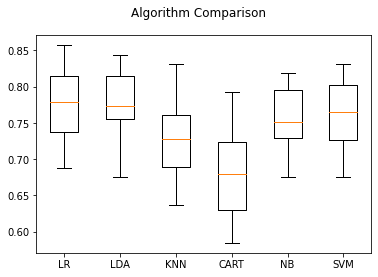

In [2]:
# Comparing Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

filename = 'pima-indians-diabetes.data.csv'
names = ['preg','plas','pres','skin','test','mass','pedi','age','class']
dataframe = read_csv(filename,names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# prepare models
models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

# evaluate each model
results = []
names = []
scoring = 'accuracy'
for name,model in models:
    kfold = KFold(n_splits=10,random_state=None)
    cv_results = cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Summary
* we discovered how to evaluate multiple different machine learning algorithms on a dataset in python with scikit-learn.